<summary><h1>Social Buzz Contents Data Analysis</h1></summary>

## Introduction
Social Buzz is a social media platform with more than 500 million active users reached there platform each month. Because of there rapid growth more than they have anticipated they need the help of an advisory firm to oversee there scaling process effectively.

There technical team create and collected a huge amount of unstructured data that they need to analyze.
### Note: Social Buzz as an unreal company


## Data Analysis

### Import the needed libraries and raw data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
content_df = pd.read_csv('raw_data/content.csv')
react_types_df = pd.read_csv('raw_data/reaction_types.csv')
reactions_df = pd.read_csv('raw_data/reactions.csv')

### Prepare and clean the content file data

In [3]:
print(content_df.head())

   Unnamed: 0                            Content ID  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2   
1           1  9f737e0a-3cdd-4d29-9d24-753f4e3be810   
2           2  230c4e4d-70c3-461d-b42c-ec09396efb3f   
3           3  356fff80-da4d-4785-9f43-bc1261031dc6   
4           4  01ab84dd-6364-4236-abbb-3f237db77180   

                                User ID   Type        Category  \
0  8d3cd87d-8a31-4935-9a4f-b319bfe05f31  photo        Studying   
1  beb1f34e-7870-46d6-9fc7-2e12eb83ce43  photo  healthy eating   
2  a5c65404-5894-4b87-82f2-d787cbee86b4  photo  healthy eating   
3  9fb4ce88-fac1-406c-8544-1a899cee7aaf  photo      technology   
4  e206e31b-5f85-4964-b6ea-d7ee5324def1  video            food   

                                                 URL  
0  https://socialbuzz.cdn.com/content/storage/975...  
1  https://socialbuzz.cdn.com/content/storage/9f7...  
2  https://socialbuzz.cdn.com/content/storage/230...  
3  https://socialbuzz.cdn.com/content/storage/356...

In [4]:
print(content_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None


In [5]:
print(content_df['Category'].unique())

['Studying' 'healthy eating' 'technology' 'food' 'cooking' 'dogs' 'soccer'
 'public speaking' 'science' 'tennis' 'travel' 'fitness' 'education'
 'studying' 'veganism' 'Animals' 'animals' 'culture' '"culture"' 'Fitness'
 '"studying"' 'Veganism' '"animals"' 'Travel' '"soccer"' 'Education'
 '"dogs"' 'Technology' 'Soccer' '"tennis"' 'Culture' '"food"' 'Food'
 '"technology"' 'Healthy Eating' '"cooking"' 'Science' '"public speaking"'
 '"veganism"' 'Public Speaking' '"science"']


In [6]:
content_df['Category'] = [item.strip('"') for item in content_df['Category']]

In [7]:
content_df['Category'] = content_df['Category'].str.lower()

In [8]:
print(content_df['Category'].unique())

['studying' 'healthy eating' 'technology' 'food' 'cooking' 'dogs' 'soccer'
 'public speaking' 'science' 'tennis' 'travel' 'fitness' 'education'
 'veganism' 'animals' 'culture']


In [9]:
print(content_df['Type'].unique())

['photo' 'video' 'GIF' 'audio']


In [10]:
content_df_new = content_df[['Content ID','Type','Category']]

In [11]:
content_df_new.rename(columns = {'Type':'Content Type'}, inplace = True)

C:\Users\GW\AppData\Local\Temp\ipykernel_8048\2703890443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df_new.rename(columns = {'Type':'Content Type'}, inplace = True)


In [12]:
print(content_df_new.to_string())

                               Content ID Content Type         Category
0    97522e57-d9ab-4bd6-97bf-c24d952602d2        photo         studying
1    9f737e0a-3cdd-4d29-9d24-753f4e3be810        photo   healthy eating
2    230c4e4d-70c3-461d-b42c-ec09396efb3f        photo   healthy eating
3    356fff80-da4d-4785-9f43-bc1261031dc6        photo       technology
4    01ab84dd-6364-4236-abbb-3f237db77180        video             food
5    cf1e8c1a-23eb-4426-9f58-002fb1b53e91          GIF          cooking
6    3f8590c7-6ab2-4973-805a-90cdec355f05        video             dogs
7    e5490118-90d5-4572-ab1c-1fbc87b8d9ca        video       technology
8    0bedca96-fb76-4287-a83c-17330ed39cce        photo           soccer
9    b18cb63f-4c8e-44ee-a47f-541e95191d11        photo  public speaking
10   5118e9c5-1377-4cc5-a486-65b35b7b7b76          GIF          science
11   46fb701d-6c26-458e-ada3-2ebe5dbba01f        audio  public speaking
12   0be59876-d70c-486c-8e0b-a06bef7a2cd6          GIF          

### Prepare and clean the reaction_types file data

In [13]:
print(react_types_df.head())

   Unnamed: 0        Type Sentiment  Score
0           0       heart  positive     60
1           1        want  positive     70
2           2     disgust  negative      0
3           3        hate  negative      5
4           4  interested  positive     30


In [14]:
print(react_types_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes
None


In [15]:
print(react_types_df.to_string())

    Unnamed: 0         Type Sentiment  Score
0            0        heart  positive     60
1            1         want  positive     70
2            2      disgust  negative      0
3            3         hate  negative      5
4            4   interested  positive     30
5            5  indifferent   neutral     20
6            6         love  positive     65
7            7   super love  positive     75
8            8      cherish  positive     70
9            9        adore  positive     72
10          10         like  positive     50
11          11      dislike  negative     10
12          12    intrigued  positive     45
13          13      peeking   neutral     35
14          14       scared  negative     15
15          15      worried  negative     12


In [16]:
react_types_df_new = react_types_df[['Type','Sentiment','Score']]

In [17]:
react_types_df_new.rename(columns = {'Type':'Reaction Type'},inplace = True)

C:\Users\GW\AppData\Local\Temp\ipykernel_8048\3954664122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  react_types_df_new.rename(columns = {'Type':'Reaction Type'},inplace = True)


In [18]:
print(react_types_df_new.to_string())

   Reaction Type Sentiment  Score
0          heart  positive     60
1           want  positive     70
2        disgust  negative      0
3           hate  negative      5
4     interested  positive     30
5    indifferent   neutral     20
6           love  positive     65
7     super love  positive     75
8        cherish  positive     70
9          adore  positive     72
10          like  positive     50
11       dislike  negative     10
12     intrigued  positive     45
13       peeking   neutral     35
14        scared  negative     15
15       worried  negative     12


### Prepare and clean the reactions file data

In [19]:
print(reactions_df.head())

   Unnamed: 0                            Content ID  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2   
1           1  97522e57-d9ab-4bd6-97bf-c24d952602d2   
2           2  97522e57-d9ab-4bd6-97bf-c24d952602d2   
3           3  97522e57-d9ab-4bd6-97bf-c24d952602d2   
4           4  97522e57-d9ab-4bd6-97bf-c24d952602d2   

                                User ID     Type             Datetime  
0                                   NaN      NaN  2021-04-22 15:17:15  
1  5d454588-283d-459d-915d-c48a2cb4c27f  disgust  2020-11-07 09:43:50  
2  92b87fa5-f271-43e0-af66-84fac21052e6  dislike  2021-06-17 12:22:51  
3  163daa38-8b77-48c9-9af6-37a6c1447ac2   scared  2021-04-18 05:13:58  
4  34e8add9-0206-47fd-a501-037b994650a2  disgust  2021-01-06 19:13:01  


In [20]:
print(reactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB
None


In [21]:
reactions_df['Type'].unique()

array([nan, 'disgust', 'dislike', 'scared', 'interested', 'peeking',
       'cherish', 'hate', 'love', 'indifferent', 'super love',
       'intrigued', 'worried', 'like', 'heart', 'want', 'adore'],
      dtype=object)

In [22]:
reactions_df_new = reactions_df[['Content ID', 'Type', 'Datetime']]

In [23]:
reactions_df_new.dropna(inplace = True)

C:\Users\GW\AppData\Local\Temp\ipykernel_8048\3838118024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactions_df_new.dropna(inplace = True)


In [24]:
reactions_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24573 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    24573 non-null  object
dtypes: object(3)
memory usage: 767.9+ KB


In [25]:
reactions_df_new['Type'].unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'love', 'indifferent', 'super love', 'intrigued',
       'worried', 'like', 'heart', 'want', 'adore'], dtype=object)

In [26]:
reactions_df_new.rename (columns = {'Type':'Reaction Type'},inplace = True)

C:\Users\GW\AppData\Local\Temp\ipykernel_8048\2037117179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactions_df_new.rename (columns = {'Type':'Reaction Type'},inplace = True)


### Join all the data needed together

In [27]:
merged_data = pd.merge(reactions_df_new, content_df_new, on = 'Content ID', how = 'inner')

In [28]:
print(merged_data.head())

                             Content ID Reaction Type             Datetime  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust  2020-11-07 09:43:50   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike  2021-06-17 12:22:51   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared  2021-04-18 05:13:58   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust  2021-01-06 19:13:01   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested  2020-08-23 12:25:58   

  Content Type  Category  
0        photo  studying  
1        photo  studying  
2        photo  studying  
3        photo  studying  
4        photo  studying  


In [29]:
merged_data = pd.merge(merged_data, react_types_df_new, on = 'Reaction Type', how = 'inner')

In [30]:
print(merged_data.head())

                             Content ID Reaction Type             Datetime  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust  2020-11-07 09:43:50   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust  2021-01-06 19:13:01   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust  2021-04-09 02:46:20   
3  9f737e0a-3cdd-4d29-9d24-753f4e3be810       disgust  2021-03-28 21:15:26   
4  230c4e4d-70c3-461d-b42c-ec09396efb3f       disgust  2020-08-04 05:40:33   

  Content Type        Category Sentiment  Score  
0        photo        studying  negative      0  
1        photo        studying  negative      0  
2        photo        studying  negative      0  
3        photo  healthy eating  negative      0  
4        photo  healthy eating  negative      0  


In [31]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction Type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content Type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None


### Starting Data Analysis to get insights

In [32]:
print(merged_data)

                                 Content ID Reaction Type  \
0      97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
1      97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
2      97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
3      9f737e0a-3cdd-4d29-9d24-753f4e3be810       disgust   
4      230c4e4d-70c3-461d-b42c-ec09396efb3f       disgust   
...                                     ...           ...   
24568  435007a5-6261-4d8b-b0a4-55fdc189754b         adore   
24569  435007a5-6261-4d8b-b0a4-55fdc189754b         adore   
24570  4e4c9690-c013-4ee7-9e66-943d8cbd27b7         adore   
24571  4e4c9690-c013-4ee7-9e66-943d8cbd27b7         adore   
24572  4e4c9690-c013-4ee7-9e66-943d8cbd27b7         adore   

                  Datetime Content Type        Category Sentiment  Score  
0      2020-11-07 09:43:50        photo        studying  negative      0  
1      2021-01-06 19:13:01        photo        studying  negative      0  
2      2021-04-09 02:46:20        photo   

In [33]:
print(merged_data['Category'].value_counts())

Category
animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: count, dtype: int64


In [34]:
merged_grp = merged_data.groupby(['Category'])

In [35]:
catg_score = merged_grp['Score'].agg(['sum'])

In [36]:
catg_score = catg_score.sort_values(by='sum', ascending=False)

In [37]:
print(catg_score)

                   sum
Category              
animals          74965
science          71168
healthy eating   69339
technology       68738
food             66676
culture          66579
travel           64880
cooking          64756
soccer           57783
education        57436
fitness          55323
studying         54269
dogs             52511
tennis           50339
veganism         49619
public speaking  49264


In [38]:
top5 = catg_score.head(5)

In [39]:
print(top5)

                  sum
Category             
animals         74965
science         71168
healthy eating  69339
technology      68738
food            66676


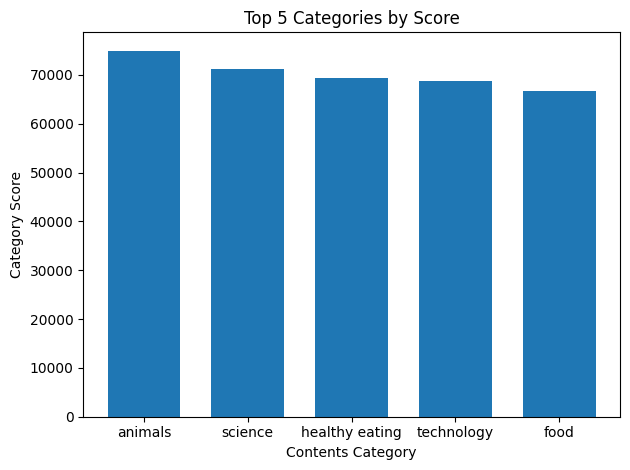

In [40]:
plt.bar(top5.index, top5['sum'],width=0.7)
plt.title('Top 5 Categories by Score')
plt.xlabel('Contents Category')
plt.ylabel('Category Score')
plt.tight_layout()
plt.show()

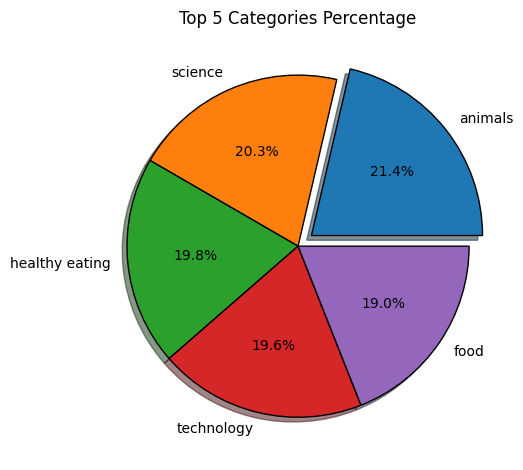

In [41]:
explode = [0.1, 0, 0, 0, 0]
plt.pie(top5['sum'],labels = top5.index, wedgeprops = {'edgecolor':'black'}, explode = explode, shadow = True, autopct = '%1.1f%%')
plt.title('Top 5 Categories Percentage')
plt.tight_layout()
plt.show()

In [42]:
sentiments_df = merged_data['Sentiment'].value_counts()

In [43]:
print(sentiments_df)

Sentiment
positive    13807
negative     7695
neutral      3071
Name: count, dtype: int64


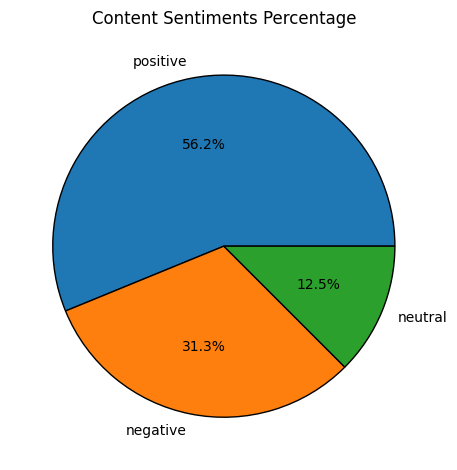

In [44]:
plt.pie(sentiments_df, labels = sentiments_df.index, wedgeprops = {'edgecolor':'black'}, autopct = '%1.1f%%')
plt.title('Content Sentiments Percentage')
plt.tight_layout()
plt.show()

In [45]:
merged_data['Datetime'] = pd.to_datetime(merged_data['Datetime'])
month_counts = merged_data['Datetime'].dt.month_name().value_counts()
print(month_counts)

Datetime
May          2138
January      2126
August       2114
December     2092
July         2070
October      2056
November     2034
September    2022
June         2021
March        2012
April        1974
February     1914
Name: count, dtype: int64


In [46]:
custom_month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
sorted_month_counts = month_counts.reindex(custom_month_sorted)
print(sorted_month_counts)

Datetime
January      2126
February     1914
March        2012
April        1974
May          2138
June         2021
July         2070
August       2114
September    2022
October      2056
November     2034
December     2092
Name: count, dtype: int64


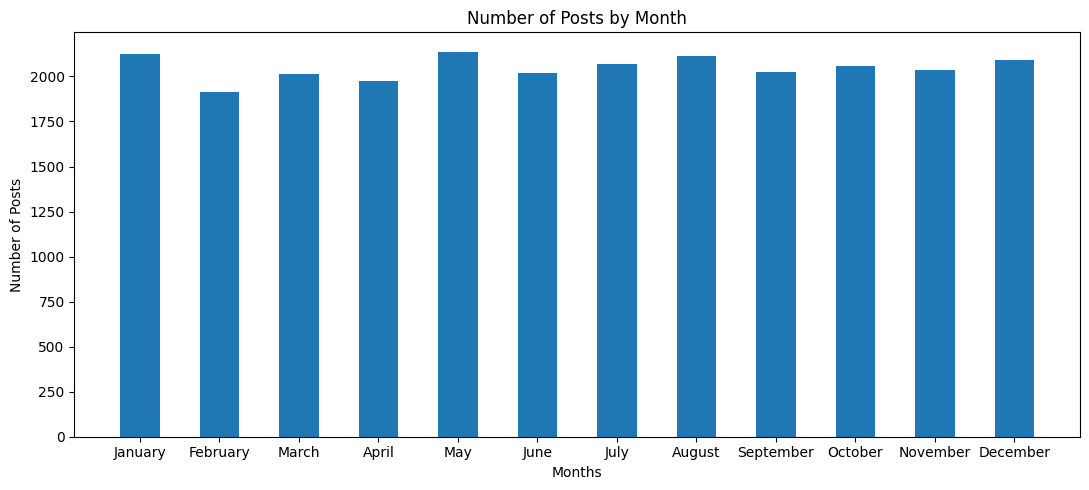

In [47]:
plt.figure(figsize = (11,5))
plt.bar(sorted_month_counts.index,sorted_month_counts.values,width = 0.5)
plt.title('Number of Posts by Month')
plt.xlabel('Months')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()

### Eng. Ahmad Mishaal Alali